# Applied Data Science - Exercise 1

This exercise is one of six assignments in the course T-786-APDS Applied Data Science at Reykjavik University.

## Preparation

Please read chapters 1, 2 and 8 of the textbook before the lab.


## Task

<img src="https://images.unsplash.com/photo-1606922699403-9a40186fcb9b?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1267&q=80" alt="second hand car" style="width: 400px;"/>

You are a data scientist at a large online marketplate in the US. The platform has millions of users and hundreds of categories of items for sale and operates in a highly competitive industry. Management has decided to expand the marketplace to include sales of second hand cars. To avoid potential issues, management wants to automatically predict an asking price for a given car. You have been tasked with creating a model which predicts a reasonable price for a car, given the information available about the car on the platform.

For example, what would be a reasonable asking price for a 2015 Toyota Corolla in good condition, for sale in Alberta?

If your model works well, it will be used to give sellers a price idea for a new listing (and maybe warn the seller that they may have made a typo in the price). The output of your model may also be used as input into another model which detects fraudulent sales listings and scams. The only viable alternative is to manually check the prices for all new listings, so your model could potentially result in substantial savings for the company.

Optimally, you would use data from users of your own platform. However, since this is the first time you are selling second hand cars, you cannot use your own data. After some research, you decide to train your model on [data scraped from the Craigslist website](https://www.kaggle.com/austinreese/craigslist-carstrucks-data). This data can be found in the file `vehicles.csv`.

In this first exercise, our focus is on the preprocessing of data. We start by exploring the dataset to gain insights.

To complete the exercise, please run the cells in this notebook, filling in the missing code where needed. The notebook mostly follows the steps in chapter 2 of the textbook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys

The code in this exercise has been tested for python version 3.10and probably works for any version >= 3.6

In [2]:
# Check python version
print("python", sys.version)

python 3.12.5 (tags/v3.12.5:ff3bc82, Aug  6 2024, 20:45:27) [MSC v.1940 64 bit (AMD64)]


In [3]:
# Optionally run this cell to get interactive (zoom-able and pan-able)
# matplotlib figures. This does not work e.g. in Google Colab.

#%matplotlib notebook

In [ ]:
# Use the pandas.read_csv function to read in the vehicles.csv file. Call the dataframe `df`. 
# Note that the csv file has an index in the first column (include the argument index_col=0)

df = pd.read_csv('../data/vehicles.csv', index_col=0)

In [5]:
# Use the pandas.DataFrame.count function to count non-null 
# cells in all columns.

count = df.count()

In [6]:
# Use the pandas.DataFrame.describe method to show descriptive
# statistics about numerical columns.

# (Hint: You can either use the pandas.DataFrame.select_dtypes 
# method to get numerical columns and then call 'describe', 
# or call the 'describe' function with the 'include' argument)

df.describe(include='number')

,id,price,year,odometer,county,lat,long
count,4.055360e+05,4.055360e+05,404400.000000,4.013590e+05,0.0,399317.000000,399317.000000
mean,7.311486e+09,7.823035e+04,2011.234266,9.804744e+04,NaN,38.495742,-94.751099
std,4.474543e+06,1.249875e+07,9.454377,2.138235e+05,NaN,5.839152,18.363843
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-84.122245,-159.827728
25%,7.308146e+09,5.900000e+03,2008.000000,3.772400e+04,NaN,34.601900,-111.939998
50%,7.312620e+09,1.395000e+04,2013.000000,8.558700e+04,NaN,39.152932,-88.434723
75%,7.315253e+09,2.649500e+04,2017.000000,1.336000e+05,NaN,42.408100,-80.830000
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07,NaN,82.390818,173.885502


In [7]:
# Use the pandas.DataFrame.describe method to show descriptive
# statistics about object columns. 

df.describe(include='object')

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,posting_date
count,405536,405536,405536,388815,400522,240214,236721,402658,397721,403107,252459,281457,114523,317332,281887,405471,405469,405536,405471
unique,405536,404,413,42,28885,6,8,5,6,3,114248,3,4,13,12,232359,344150,51,364118
top,https://anchorage.craigslist.org/ctd/d/anchora...,columbus,https://spokane.craigslist.org,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,https://images.craigslist.org/00N0N_1xMPvfxRAI...,35 VEHICLES PRICED UNDER $3000!!! BIG TIME! T...,ca,2021-04-23T22:13:05-0400
freq,1,3437,2860,67503,7602,115385,89476,338424,384924,319664,250,125248,60352,82678,75366,6987,217,48115,12


**Question:** How many unique car models are present in the dataset? What is the most popular fuel type and how often does it occur?

There are 28885 unique car models.
The most popular fuel type is gas and it occurs 338424 times.

In [8]:
# Use the pandas.DataFrame.info method to print a summary 
# of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 405536 entries, 196639 to 353497
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            405536 non-null  int64  
 1   url           405536 non-null  object 
 2   region        405536 non-null  object 
 3   region_url    405536 non-null  object 
 4   price         405536 non-null  int64  
 5   year          404400 non-null  float64
 6   manufacturer  388815 non-null  object 
 7   model         400522 non-null  object 
 8   condition     240214 non-null  object 
 9   cylinders     236721 non-null  object 
 10  fuel          402658 non-null  object 
 11  odometer      401359 non-null  float64
 12  title_status  397721 non-null  object 
 13  transmission  403107 non-null  object 
 14  VIN           252459 non-null  object 
 15  drive         281457 non-null  object 
 16  size          114523 non-null  object 
 17  type          317332 non-null  object 
 18  pain

Most of the columns are straightforward to understand from the column header, but not all of them. Luckily, here is a description of the data columns that came with the data:

* `id`: Entry ID
* `url`: Listing URL
* `region`: Craigslist region
* `region_url`: Region URL
* `price`: Entry price
* `year`: Entry year
* `manufacturer`: Manufacturer of vehicle
* `model`: Model of vehicle
* `condition`: Condition of vehicle
* `cylinders`: Number of cylinders
* `fuel`: Fuel type
* `odometer`: Miles traveled by vehicle
* `title_status`: Title status of vehicle
* `transmission`: Transmission of vehicle
* `VIN`: Vehicle identification number
* `drive`: Type of drive
* `size`: Size of vehicle
* `type`: Generic type of vehicle
* `paint_color`: Color of vehicle
* `image_url`: Image URL
* `description`: Listed description of vehicle
* `county`: Useless column left in by mistake
* `state`: State of listing
* `lat`: Latitude of listing

In [9]:
# Print the 10 first rows in the dataframe

df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
196639,7316236899,https://detroit.craigslist.org/wyn/cto/d/detro...,detroit metro,https://detroit.craigslist.org,2800,2009.0,chrysler,sebring,like new,4 cylinders,...,compact,sedan,blue,https://images.craigslist.org/00C0C_3ej8F6JQCC...,09 chrysler sebring sedan with 114824 miles on...,NaN,mi,42.331600,-83.128800,2021-05-03T12:00:07-0400
322322,7316827529,https://portland.craigslist.org/yam/ctd/d/newb...,portland,https://portland.craigslist.org,7995,2010.0,subaru,forester 2.5 x,good,4 cylinders,...,mid-size,wagon,blue,https://images.craigslist.org/00W0W_f23l8kDu0M...,2010 SUBARU FORESTER WAGON PZEV MODEL RUNS AND...,NaN,or,45.291230,-122.949765,2021-05-04T10:50:59-0700
100078,7308917406,https://jacksonville.craigslist.org/cto/d/jack...,jacksonville,https://jacksonville.craigslist.org,1950,2007.0,toyota,camry le,good,4 cylinders,...,mid-size,sedan,NaN,https://images.craigslist.org/00101_45plPqyGom...,Will consider all offers. Cash only. 2007 Beig...,NaN,fl,30.262783,-81.557314,2021-04-18T16:22:02-0400
68236,7307401108,https://ventura.craigslist.org/cto/d/ventura-2...,ventura county,https://ventura.craigslist.org,4500,2004.0,NaN,SUBURBAN LT,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01616_kGPpTwZtkB...,"5.3 LITER V8 , AUTO TRANS, BOSE SOUND SYSTEM, ...",NaN,ca,34.284600,-119.222200,2021-04-15T13:49:40-0700
290458,7311595311,https://cincinnati.craigslist.org/ctd/d/camp-d...,cincinnati,https://cincinnati.craigslist.org,13500,2020.0,chevrolet,spark 4dr hb cvt ls,NaN,NaN,...,NaN,NaN,custom,https://images.craigslist.org/00N0N_bHEZ6gK2YA...,***Call Us for more information at: 513-453-41...,NaN,oh,39.171991,-84.271999,2021-04-23T17:45:29-0400
90570,7313738424,https://washingtondc.craigslist.org/nva/ctd/d/...,"washington, DC",https://washingtondc.craigslist.org,38990,2020.0,jaguar,f-pace 25t sport utility,good,NaN,...,NaN,other,black,https://images.craigslist.org/00M0M_haQuJem3FX...,Carvana is the safer way to buy a car During t...,NaN,dc,38.890000,-77.030000,2021-04-28T07:22:13-0400
227352,7309259693,https://helena.craigslist.org/cto/d/garrison-2...,helena,https://helena.craigslist.org,31995,2016.0,ford,f150 xlt supercrew,excellent,NaN,...,NaN,pickup,grey,https://images.craigslist.org/00x0x_e7J3WVhDSe...,2016 Ford F150 Supercrew XLT. 6cyl Ecoboost. S...,NaN,mt,46.594800,-112.775600,2021-04-19T09:34:35-0600
139507,7311072202,https://bn.craigslist.org/ctd/d/mansfield-e-i-...,bloomington-normal,https://bn.craigslist.org,6950,2005.0,ram,slt crew cab,good,8 cylinders,...,full-size,pickup,red,https://images.craigslist.org/00Q0Q_afHsWqBbic...,2OO5 DODGE RAM 1500 SLT 4 DOOR CREW CAB 5.7 ...,NaN,il,40.214700,-88.517900,2021-04-22T16:34:13-0500
253745,7315574453,https://newjersey.craigslist.org/cto/d/irvingt...,north jersey,https://newjersey.craigslist.org,13700,2014.0,jeep,grand cherokee limited,excellent,6 cylinders,...,full-size,SUV,red,https://images.craigslist.org/01313_7QKLpsKrjM...,SELLING MY 2014 JEEP GRAND CHEROKEE LIMITED E...,NaN,nj,40.726100,-74.231300,2021-05-01T19:47:48-0400
241526,7313359304,https://raleigh.craigslist.org/cto/d/pittsboro...,raleigh / durham / CH,https://raleigh.craigslist.org,3500,2009.0,honda,accord,salvage,4 cylinders,...,full-size,sedan,black,https://images.craigslist.org/00n0n_64Qm0mjjZh...,"2009 Honda Accord for sale, salvage title. Has...",NaN,nc,35.726608,-79.187220,2021-04-27T12:06:58-0400


In [10]:
# Print the last 10 rows in the dataframe

df.tail(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
310556,7303151104,https://tulsa.craigslist.org/ctd/d/broken-arro...,tulsa,https://tulsa.craigslist.org,4998,2003.0,toyota,corolla,excellent,4 cylinders,...,compact,sedan,NaN,https://images.craigslist.org/00909_eBvagGoX7b...,2003 Toyota Corolla 4dr Sdn CE Sedan Drive i...,NaN,ok,36.016469,-95.699964,2021-04-07T11:01:46-0500
345549,7312023298,https://columbia.craigslist.org/ctd/d/columbia...,columbia,https://columbia.craigslist.org,26590,2020.0,honda,civic si coupe 2d,good,NaN,...,NaN,coupe,silver,https://images.craigslist.org/00Z0Z_1s2m76Sn1T...,Carvana is the safer way to buy a car During t...,NaN,sc,34.000000,-81.030000,2021-04-24T15:31:06-0400
79125,7313267070,https://fortcollins.craigslist.org/ctd/d/fort-...,fort collins / north CO,https://fortcollins.craigslist.org,30990,2017.0,toyota,tundra double cab sr,good,8 cylinders,...,NaN,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,Carvana is the safer way to buy a car During t...,NaN,co,40.550000,-105.060000,2021-04-27T07:18:00-0600
410787,7316979023,https://spokane.craigslist.org/cto/d/spokane-2...,spokane / coeur d'alene,https://spokane.craigslist.org,19000,2014.0,mitsubishi,lancer evolution gsr,excellent,4 cylinders,...,NaN,sedan,white,https://images.craigslist.org/00b0b_gSQArDLr84...,Selling my very clean 2014 Evo X. The car has ...,NaN,wa,47.612500,-117.378300,2021-05-04T15:14:55-0700
280860,7312391817,https://syracuse.craigslist.org/ctd/d/syracuse...,syracuse,https://syracuse.craigslist.org,33990,2020.0,dodge,challenger gt coupe 2d,good,NaN,...,NaN,coupe,white,https://images.craigslist.org/00Q0Q_gNq3FLQroM...,Carvana is the safer way to buy a car During t...,NaN,ny,43.040000,-76.140000,2021-04-25T13:11:23-0400
310020,7306770645,https://tulsa.craigslist.org/ctd/d/norman-2019...,tulsa,https://tulsa.craigslist.org,16988,2019.0,hyundai,accent,like new,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/01414_cQcDJpNWy4...,THIS ONE OWNER 2019 HYUNDAI ACCENT THAT JUST A...,NaN,ok,35.199000,-97.484100,2021-04-14T12:44:53-0500
220918,7306573574,https://kirksville.craigslist.org/ctd/d/atlant...,kirksville,https://kirksville.craigslist.org,41590,2017.0,mercedes-benz,mercedes-amg cla,good,NaN,...,NaN,coupe,red,https://images.craigslist.org/00N0N_1xMPvfxRAI...,Carvana is the safer way to buy a car During t...,NaN,mo,33.786500,-84.445400,2021-04-14T06:01:13-0500
92588,7312037246,https://daytona.craigslist.org/ctd/d/alachua-c...,daytona beach,https://daytona.craigslist.org,22750,2018.0,chevrolet,equinox lt,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00v0v_brrq0raBgD...,2018 CHEVROLET EQUINOX LT ~ Hundreds of NEW & ...,NaN,fl,29.802119,-82.529869,2021-04-24T15:55:23-0400
71596,7303947372,https://yubasutter.craigslist.org/ctd/d/yuba-c...,yuba-sutter,https://yubasutter.craigslist.org,9999,2008.0,honda,civic si,excellent,4 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00c0c_5b02l5lCW7...,"2008 Honda Civic Si182,264 mi. - Manual - 4D S...",NaN,ca,39.123441,-121.611440,2021-04-08T17:03:28-0700
353497,7308217153,https://cookeville.craigslist.org/ctd/d/cookev...,cookeville,https://cookeville.craigslist.org,30590,2018.0,gmc,acadia sle-2 sport utility,good,NaN,...,NaN,other,black,https://images.craigslist.org/00O0O_94d96UUCs6...,Carvana is the safer way to buy a car During t...,NaN,tn,36.150000,-85.500000,2021-04-17T09:21:37-0500


In [11]:
# Print the 27th row in the dataframe

df.iloc[26]

id                                                     7304759105
url             https://medford.craigslist.org/ctd/d/gladstone...
region                                            medford-ashland
region_url                         https://medford.craigslist.org
price                                                           0
year                                                       2017.0
manufacturer                                                  ram
model                                  2500 6-speed manual diesel
condition                                                     NaN
cylinders                                             6 cylinders
fuel                                                       diesel
odometer                                                 135292.0
title_status                                                clean
transmission                                               manual
VIN                                             3C6UR4CL1HG615370
drive     

In [12]:
# Print the full 'description' attribute of the 27th row

df.iloc[26]['description']

"Carz Planet\xa0  \xa0\xa0\xa0\xa0\xa0\xa0\xa0STOCK #:\xa0\xa06997  \xa0 💲 💲 FOR BEST PRICE CALL OR TEXT SAMMY:\xa0\xa0503-683-1212\xa0📞VEHICLE SPECIFICATIONS\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0YEAR:\xa0\xa0 2017\xa0 \xa0\xa0\xa0\xa0\xa0\xa0\xa0\xa0MAKE:\xa0\xa0\xa0Ram \xa0\xa0\xa0\xa0\xa0MODEL:\xa0\xa0\xa02500 \xa0 \xa0STOCK #:\xa0\xa0 6997\xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0 \xa0VIN:\xa0\xa0 3C6UR4CL1HG615370\xa0 \xa0 \xa0 \xa0 \xa0 \xa0TRIM:\xa0\xa0 6-SPEED MANUAL DIESEL TRUCK AMERICAN TRUCK 6SPD\xa0\xa0MILEAGE:\xa0\xa0 135,292 \xa0 \xa0 \xa0 COLOR:\xa0\xa0 White / Gray \xa0 \xa0 \xa0 \xa0 \xa0BODY:\xa0\xa0 Truck \xa0 \xa0 \xa0 \xa0TRANS:\xa0\xa0 6 Speed Manual \xa0 \xa0 \xa0 \xa0 \xa0AD\xa0ID:\xa0\xa0 5E69C4CE5056A981\xa0 \xa0 ENGINE:\xa0\xa0 Cummins 6.7L Diesel Turbo I6 350hp 660ft. lbs. 6  Cyl  \xa0 \xa0 \xa0 \xa0 \xa0FUEL:\xa0\xa0 Diesel \xa0 \xa0 \xa0 \xa0DRIVE:\xa0\xa0 RWD \xa0 \xa0 \xa0 \xa0 \xa0 MPG:\xa0\xa0  City /  Hwy ⚡ ⚡ ⚡ ⚡ ⚡\xa0 CALL/TEXT\xa0SAMMY\xa0503-683-1212\xa0⚡\xa

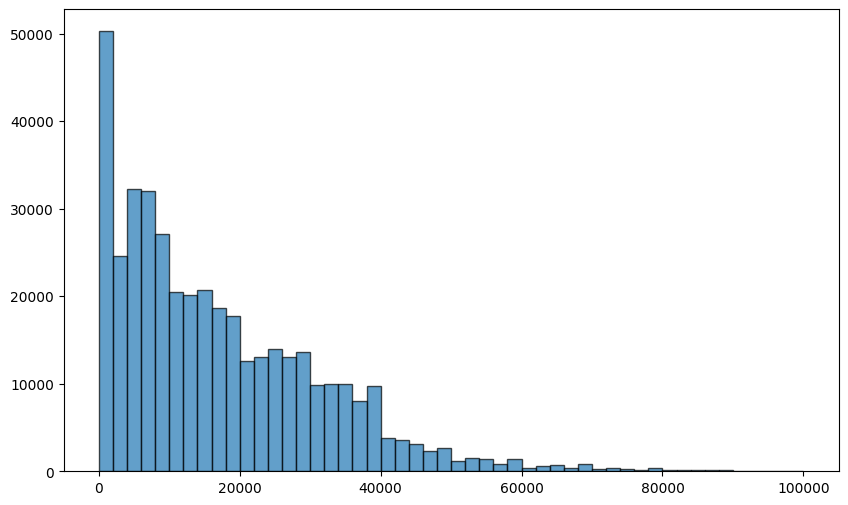

In [96]:
# Plot a histogram of the 'price' column for all rows where 
# the price is less than $100k. Use 50 bins.

lessThanHundredK = df[df.price < 100000]
prices = lessThanHundredK.price
hist = prices.hist(bins=50, edgecolor='black', alpha=0.7, grid=False, figsize=(10,6))
plt.show()

In [14]:
# Print all dataframe rows where the price is above 1 million.

df[df.price>1000000]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
377396,7304058775,https://killeen.craigslist.org/ctd/d/belton-th...,killeen / temple / ft hood,https://killeen.craigslist.org,1234567,1955.0,chevrolet,NaN,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00X0X_1HYYivCJqB...,THE 38TH ANNUAL NATIONALLY ADVERTISED BELTON S...,NaN,tx,31.052169,-97.497654,2021-04-09T06:01:57-0500
327938,7314563134,https://altoona.craigslist.org/cto/d/revloc-bu...,altoona-johnstown,https://altoona.craigslist.org,3226714,2002.0,NaN,any and all,fair,8 cylinders,...,mid-size,sedan,blue,https://images.craigslist.org/00B0B_heEI8cTCHX...,Buying Junk/Unwanted/Crashed Vehicles Cars-tru...,NaN,pa,40.480100,-78.726300,2021-04-29T18:24:17-0400
280,7315849335,https://bham.craigslist.org/cto/d/trussville-1...,birmingham,https://bham.craigslist.org,987654321,1960.0,chevrolet,NaN,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00E0E_fZYzwRGkoI...,(TRADE VALUE IS HIGHER )I have a 1960 Impala h...,NaN,al,33.633900,-86.598100,2021-05-02T13:24:09-0500
377515,7301832876,https://killeen.craigslist.org/ctd/d/belton-th...,killeen / temple / ft hood,https://killeen.craigslist.org,1234567,1955.0,chevrolet,NaN,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00X0X_1HYYivCJqB...,THE 38TH ANNUAL NATIONALLY ADVERTISED BELTON S...,NaN,tx,31.052169,-97.497654,2021-04-04T17:28:43-0500
153082,7305153975,https://indianapolis.craigslist.org/cto/d/indi...,indianapolis,https://indianapolis.craigslist.org,1234567890,2006.0,volvo,vnl,fair,NaN,...,NaN,NaN,black,https://images.craigslist.org/01212_h8lmJc10P0...,2006 Volvo VNL Twin-screw/sleeper motor has un...,NaN,in,39.785100,-86.159500,2021-04-11T11:19:14-0400
283906,7314839271,https://nh.craigslist.org/cto/d/tyngsboro-mill...,new hampshire,https://nh.craigslist.org,5000000,2021.0,NaN,all,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00K0K_6qH8KCkbyV...,WE NEED INVENTORY! We have opened the Vault a...,NaN,nh,42.672400,-71.415800,2021-04-30T11:57:41-0400
318592,7308056031,https://eugene.craigslist.org/cto/d/florence-2...,eugene,https://eugene.craigslist.org,3736928711,2007.0,toyota,tundra,excellent,8 cylinders,...,full-size,pickup,silver,https://images.craigslist.org/00v0v_3K0RsmdR5c...,Selling my 2007 Toyota Tundra SR5 four wheel d...,NaN,or,44.066092,-124.037561,2021-04-16T18:16:12-0700
288356,7302369138,https://akroncanton.craigslist.org/cto/d/barbe...,akron / canton,https://akroncanton.craigslist.org,123456789,1965.0,chevrolet,project,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00Q0Q_i7qdTN6X31...,"1965 Chevy Nova $10,000 FIRM. New floors, new ...",NaN,oh,41.019700,-81.621200,2021-04-05T19:34:36-0400
362837,7303378226,https://abilene.craigslist.org/ctd/d/belton-th...,abilene,https://abilene.craigslist.org,1234567,1955.0,chevrolet,NaN,NaN,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00X0X_1HYYivCJqB...,THE 38TH ANNUAL NATIONALLY ADVERTISED BELTON S...,NaN,tx,31.052169,-97.498512,2021-04-07T17:14:08-0500
384872,7304058513,https://waco.craigslist.org/ctd/d/belton-the-3...,waco,https://waco.craigslist.org,1234567,1955.0,chevrolet,NaN,good,NaN,...,NaN,NaN,NaN,https://images.craigslist.org/00X0X_1HYYivCJqB...,THE 38TH ANNUAL NATIONALLY ADVERTISED BELTON S...,NaN,tx,31.053051,-97.497826,2021-04-09T06:00:14-0500


**Question:** What does your intuition say about these car listings? Are these mostly nonsense prices?

**Answer:** `I assume most of the prices are random placeholder values.`

In [15]:
# Use the pandas.DataFrame.value_counts method to print a count
# of unique values in the 'condition' column in descending order.

df['condition'].value_counts()

condition
good         115385
excellent     96425
like new      20150
fair           6441
new            1241
salvage         572
Name: count, dtype: int64

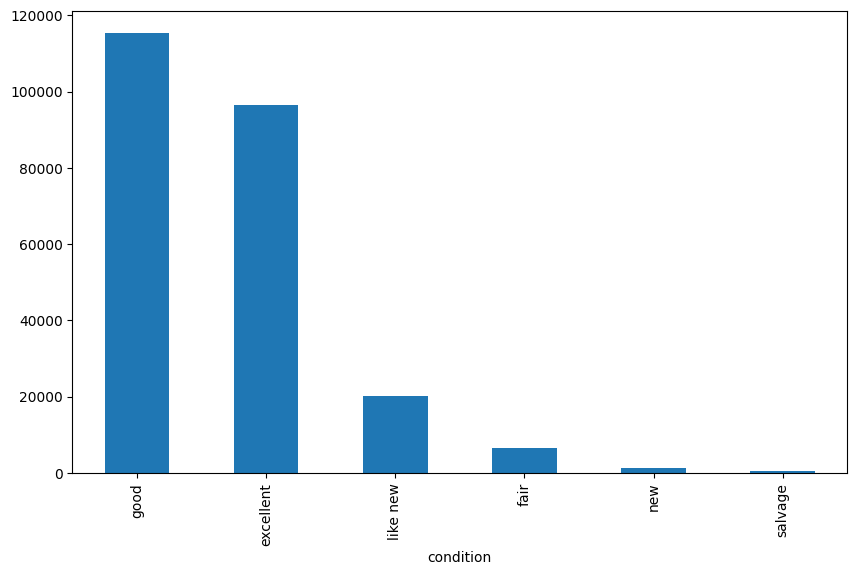

In [97]:
# Plot a histogram of the 'condition' values to see the same
# information more visually.

values = df['condition'].value_counts()
values.plot(kind='bar', figsize=(10, 6))
plt.show()

In [17]:
# Again use the value_counts method, this time to print a count
# of unique values for 'title_status'.

df['title_status'].value_counts()

title_status
clean         384924
rebuilt         6828
salvage         3662
lien            1356
missing          763
parts only       188
Name: count, dtype: int64

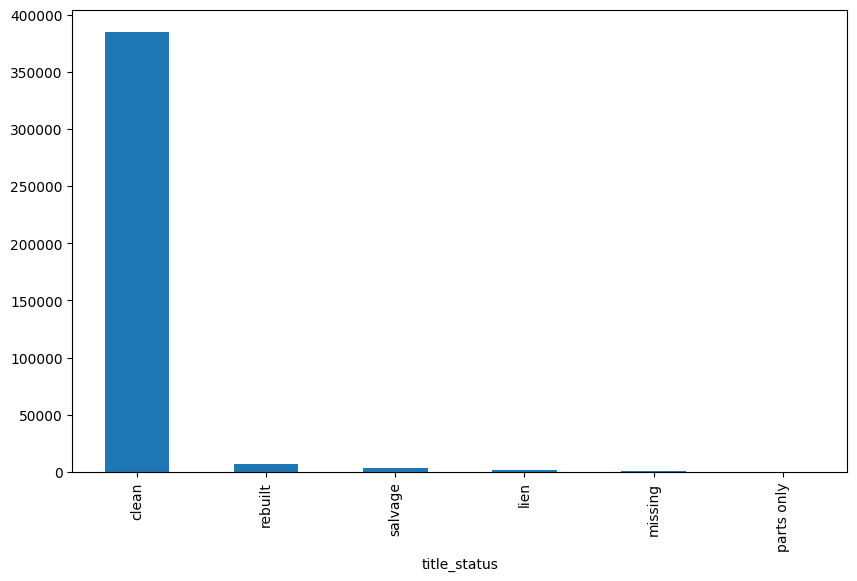

In [98]:
# And plot a histogram of the 'title_status' values.

values = df['title_status'].value_counts()
values.plot(kind='bar', figsize=(10, 6))
plt.show()

## Removing garbage

We can already start removing some of the data. This step could also be done after splitting the data into the test- and training sets.

In [19]:
# Again, to avoid mistakes, we create a copy of the data to work on
reduced_df = df.copy()

# Remove all rows where price is zero or less
reduced_df = reduced_df[reduced_df['price'] > 0]

# Remove all rows where price is not set
reduced_df = reduced_df[reduced_df['price'].notna()]

# Remove all rows where price is above $1,000,000
reduced_df = reduced_df[reduced_df['price'] < 1000000]

# Remove all rows where neither model nor manufacturer is defined
reduced_df = reduced_df[~((reduced_df.manufacturer.isnull()) & (reduced_df.manufacturer.isnull()))]

# Remove 'VIN', county, id, region_url and image_url columns
reduced_df = reduced_df.drop(columns=[
    'county', 
    'id', 
    'region_url', 
    'url', 
    'image_url',
    'VIN'
])

# Print the first 5 rows of the dataframe
reduced_df.head()

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,lat,long,posting_date
196639,detroit metro,2800,2009.0,chrysler,sebring,like new,4 cylinders,gas,114824.0,clean,automatic,fwd,compact,sedan,blue,09 chrysler sebring sedan with 114824 miles on...,mi,42.331600,-83.128800,2021-05-03T12:00:07-0400
322322,portland,7995,2010.0,subaru,forester 2.5 x,good,4 cylinders,gas,74890.0,salvage,automatic,4wd,mid-size,wagon,blue,2010 SUBARU FORESTER WAGON PZEV MODEL RUNS AND...,or,45.291230,-122.949765,2021-05-04T10:50:59-0700
100078,jacksonville,1950,2007.0,toyota,camry le,good,4 cylinders,gas,102576.0,clean,automatic,fwd,mid-size,sedan,NaN,Will consider all offers. Cash only. 2007 Beig...,fl,30.262783,-81.557314,2021-04-18T16:22:02-0400
290458,cincinnati,13500,2020.0,chevrolet,spark 4dr hb cvt ls,NaN,NaN,NaN,17282.0,clean,automatic,fwd,NaN,NaN,custom,***Call Us for more information at: 513-453-41...,oh,39.171991,-84.271999,2021-04-23T17:45:29-0400
90570,"washington, DC",38990,2020.0,jaguar,f-pace 25t sport utility,good,NaN,gas,10028.0,clean,other,NaN,NaN,other,black,Carvana is the safer way to buy a car During t...,dc,38.890000,-77.030000,2021-04-28T07:22:13-0400


### Creating a test set

Before we go any further, we need to set aside a test set. Since we have quite a lot of data we won't worry about stratified sampling (although we will keep it in mind in later exercises if we run into issues when we test our models with the test set). Since we will be loading the same dataset again in future exercises, we use a seed so that we can reproduce the same train/test split again without needing to save the data.

In [20]:
# Use the sklearn.train_test_split method to split the data (reduced_df) into a test and train set.
# Set aside 10% of the data for the test set and use a random seed of 123
# Name the train set dataframe variable `train_set`. This is the dataframe we
# will continue exploring.

from sklearn.model_selection import train_test_split

random_seed = 123
train_set, test_set = train_test_split(reduced_df, test_size=0.1, random_state=random_seed)

In [21]:
# Count non-null cells in all columns in the test set (df).

test_set.count()

region          35891
price           35891
year            35891
manufacturer    35891
model           35440
condition       21963
cylinders       21204
fuel            35700
odometer        35697
title_status    35223
transmission    35741
drive           24982
size            10063
type            28095
paint_color     25096
description     35890
state           35891
lat             35594
long            35594
posting_date    35891
dtype: int64

In [22]:
# Use the 'info' method to print a summary of the training data

train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 323010 entries, 178671 to 299209
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        323010 non-null  object 
 1   price         323010 non-null  int64  
 2   year          323006 non-null  float64
 3   manufacturer  323010 non-null  object 
 4   model         319077 non-null  object 
 5   condition     198643 non-null  object 
 6   cylinders     191864 non-null  object 
 7   fuel          321120 non-null  object 
 8   odometer      321140 non-null  float64
 9   title_status  316774 non-null  object 
 10  transmission  321534 non-null  object 
 11  drive         225659 non-null  object 
 12  size          90666 non-null   object 
 13  type          254523 non-null  object 
 14  paint_color   227335 non-null  object 
 15  description   323009 non-null  object 
 16  state         323010 non-null  object 
 17  lat           320115 non-null  float64
 18  long

## Exploring relationships

Now we can start looking into how the price is affected by the other attributes.

In [23]:
# It would be preferable to think in terms of the age of the car, rather than the
# year it was manufactured. Should we define the age as the number of years between now
# and the manufactury year? First, lets check the highest value for year in the dataframe

print(
    'Highest year in the data: ',
    train_set['year'].max()
)

Highest year in the data:  2022.0


In [24]:
# So the newest cars are from 2022, but the data is crawled in 2021. Weird.
# How many rows have the year 2022?

print(train_set[train_set['year'] == 2022].count()['year'])

62


In [25]:
# So lets define the age as the difference between the 'year' column and the highest value in the 
# 'year' column. Create a new column with this value and call it 'age'

train_set['age'] = train_set['year'].max() - train_set['year']

In [26]:
# Check how strongly each of the numerical attribute columns correlate 
# with the price. Print the correlation values in descending order.

numerical_columns = train_set.select_dtypes(include=[np.number])
df_corr = numerical_columns.corr().price.sort_values(ascending=False)
print(df_corr)


price       1.000000
year        0.342421
lat        -0.005718
long       -0.079239
odometer   -0.179397
age        -0.342421
Name: price, dtype: float64


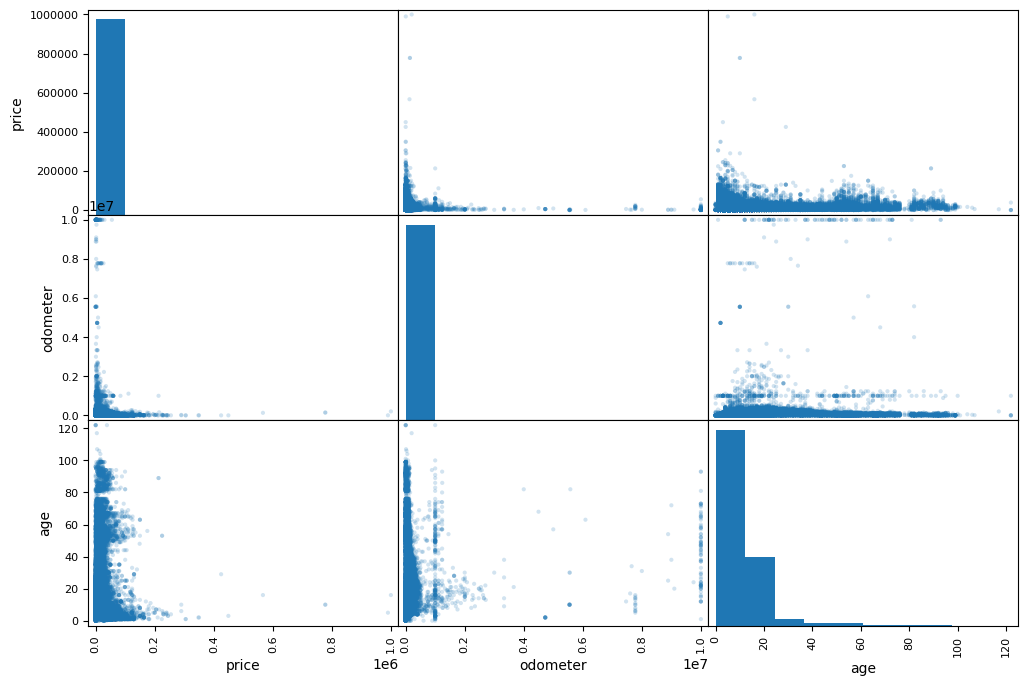

In [40]:
# Use the pandas.plotting scatter_matrix function
# to create scatter plot of price, odometer and age

from pandas.plotting import scatter_matrix
scatter_matrix(train_set[['price', 'odometer', 'age']], figsize=(12, 8), alpha=0.2)
plt.show()

**Question:** Do you have any observations about the age/price distribution? Does it look like there are outliers in the odometer column?

**Answer:** `The trend seems to be the younger the car, the higher the price. We saw that also in the correlation, year is positively correlated with price. Although, from the plot we can see that there are exceptions, there is a small spike at age around 60, where the price seems to be quite high.
There are definitely outliers in the odometer column, it's highly unlikely that any car has been driven 10,000,000 miles, or even 1,000,000 miles, so all the accurate values are very close to 0 on the plot. Doesn't tell us much while we have not removed outliers.`

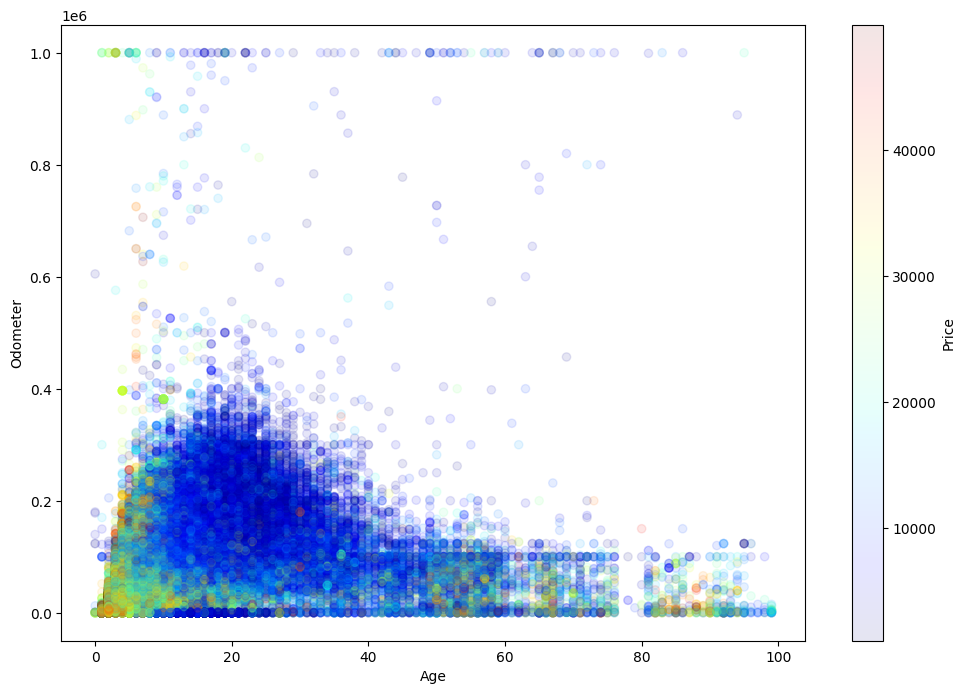

In [45]:
# Create a scatter plot of the data with 'age' on the horizontal axis and 'odometer'
# on the vertical axis. Only use data where the price is between $1000 and $50,000, 
# where the odometer value is less than 1000,000 and the age is less than 100 years.
# Assign the points on the scatter plot a color according to the price.

# (Hint: For better visibility, an alpha value of 0.1 and the colormap 
# plt.get_cmap('jet') are recommended)

price_filter = (train_set['price'] > 1000) & (train_set['price'] < 50000)
odometer_filter = train_set['odometer'] < 1000000
age_filter = train_set['age'] < 100
filtered_data = train_set[price_filter & odometer_filter & age_filter]

plt.figure(figsize=(12, 8))
plt.scatter(
    filtered_data['age'],
    filtered_data['odometer'],
    c=filtered_data['price'],
    cmap=plt.get_cmap('jet'),
    alpha=0.1
)
plt.colorbar(label='Price')
plt.xlabel('Age')
plt.ylabel('Odometer')
plt.show()

**Question:** Looking at this plot, how is price affected by mileage and age?

**Answer:** `Prices tend to be higher the younger and less driven the car is, with some outliers.`

**Question:** Do you see an age group which has very few cars for sale? Do you have a hypothesis as to why this might be? 

**Answer:** `Yes, the age group from around 76 years old to 80 years old cars. My hypothysis is that those are the years of WW2, and therefore little car sales.`

Next up: Color. Is there a difference in the average price for cars painted in different colors? Can we maybe remove the `paint_color` column altogether?

In [50]:
# What is the mean price, year and odometer for each paint color type?

# (Hint: To print the mean of the numerical columns with the data split based on paint color,
# use the pandas.DataFrame.groupby method to split the data into groups based on the 
# 'paint_color' attribute and the 'mean' aggregator to calculate the group mean.)

color_split = train_set.groupby('paint_color')
price_mean_by_color = color_split['price'].mean()
print(price_mean_by_color)

paint_color
black     21846.129015
blue      17186.821080
brown     16257.805010
custom    15964.700606
green     12977.924847
grey      15572.054208
orange    19568.716826
purple    14834.656134
red       19476.149774
silver    16820.279051
white     22344.315748
yellow    19687.582822
Name: price, dtype: float64


In [51]:
# Do the same as above, but with the median instead of the mean.

price_median_by_color = color_split['price'].median()
print(price_median_by_color)

paint_color
black     18990.0
blue      13900.0
brown     12274.5
custom    12400.0
green      8500.0
grey      11699.0
orange    18590.0
purple     9995.0
red       16590.0
silver    13500.0
white     19968.0
yellow    15900.0
Name: price, dtype: float64


In [52]:
# How many rows are there of each paint color?

paint_color_counts = train_set['paint_color'].value_counts()
print(paint_color_counts)

paint_color
white     59253
black     48723
silver    33338
blue      24279
red       23275
grey      18964
green      5562
custom     5284
brown      5190
yellow     1467
orange     1462
purple      538
Name: count, dtype: int64


C:\Users\arojo\AppData\Local\Temp\ipykernel_23848\1756776314.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  green_cars = green_cars[price_filter]
C:\Users\arojo\AppData\Local\Temp\ipykernel_23848\1756776314.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  orange_cars = orange_cars[price_filter]


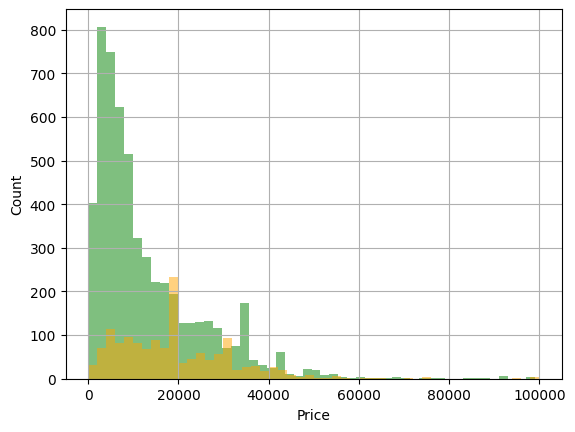

In [62]:
# Green cars seem to be on average cheaper and orange cars on average more expensive.
# Try plotting a histogram of the prices for these two colors.

green_cars = train_set[train_set['paint_color'] == 'green']
green_cars = green_cars[price_filter]
orange_cars = train_set[train_set['paint_color'] == 'orange']
orange_cars = orange_cars[price_filter]

green_cars['price'].hist(bins=50, alpha=0.5, label='green', color='green')
orange_cars['price'].hist(bins=50, alpha=0.5, label='orange', color='orange')

plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

**Question:** Looking at the data and using your intuition, do you think color is a good attribute for modeling? Why or why not?

**Answer:** ``

In [99]:
# There is an attribute called 'posting_date' which is the timestamp of when the 
# car listing was posted. Here is an example:

print(df.iloc[0].posting_date)

# Next, lets look at how this attribute affects the price. First, we create a 
# copy of the data, since we will be creating new columns.

date_df = train_set.copy()

2021-05-03T12:00:07-0400


In [100]:
# Create a new column in the date_df dataframe with the posting_date attribute as an object
# of the type datetime using the pandas.to_datetime module. Use the column header 'posting_datetime'.
# Use UTC time (set argument utc=True) and remove timezone information with '.dt.tz_convert(None)'

date_df['posting_datetime'] = pd.to_datetime(date_df['posting_date'], utc=True).dt.tz_convert(None)
print(date_df['posting_datetime'].head())

178671   2021-04-28 15:02:25
115417   2021-04-22 15:16:44
183330   2021-04-13 15:17:19
67156    2021-04-29 00:49:03
357797   2021-04-19 00:55:06
Name: posting_datetime, dtype: datetime64[ns]


In [101]:
# Create a column titled 'day_of_month' with the month day of the posting_date
# (Hint: pandas.Series.dt.day)

date_df['day_of_month'] = date_df['posting_datetime'].dt.day
print(date_df['day_of_month'].head())

178671    28
115417    22
183330    13
67156     29
357797    19
Name: day_of_month, dtype: int32


In [102]:
# Create a column titled 'day_of_week' with the weekday of the posting_date

date_df['day_of_week'] = date_df['posting_datetime'].dt.dayofweek
print(date_df['day_of_week'].head())

178671    2
115417    3
183330    1
67156     3
357797    0
Name: day_of_week, dtype: int32


In [103]:
# Create a column titled 'hour' with the hour of day of the posting_date

date_df['hour'] = date_df['posting_datetime'].dt.hour
print(date_df['hour'].head())

178671    15
115417    15
183330    15
67156      0
357797     0
Name: hour, dtype: int32


In [104]:
# Create a column titled 'days_since' with the number of days since the listing was posted

# (Hint: Use the datetime python module's datetime.now() method to get the datetime now)

import datetime

date_df['days_since'] = (datetime.datetime.now() - date_df['posting_datetime'].dt.tz_localize(None)).dt.days
print(date_df['days_since'].head())

178671    1462
115417    1468
183330    1477
67156     1462
357797    1472
Name: days_since, dtype: int64


Lets have a look the distribution of our new variables:

array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='hour', ylabel='price'>,
        <Axes: xlabel='day_of_week', ylabel='price'>,
        <Axes: xlabel='day_of_month', ylabel='price'>,
        <Axes: xlabel='days_since', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='hour'>,
        <Axes: xlabel='hour', ylabel='hour'>,
        <Axes: xlabel='day_of_week', ylabel='hour'>,
        <Axes: xlabel='day_of_month', ylabel='hour'>,
        <Axes: xlabel='days_since', ylabel='hour'>],
       [<Axes: xlabel='price', ylabel='day_of_week'>,
        <Axes: xlabel='hour', ylabel='day_of_week'>,
        <Axes: xlabel='day_of_week', ylabel='day_of_week'>,
        <Axes: xlabel='day_of_month', ylabel='day_of_week'>,
        <Axes: xlabel='days_since', ylabel='day_of_week'>],
       [<Axes: xlabel='price', ylabel='day_of_month'>,
        <Axes: xlabel='hour', ylabel='day_of_month'>,
        <Axes: xlabel='day_of_week', ylabel='day_of_month'>,
        <Axes: xlabel='day_of_m

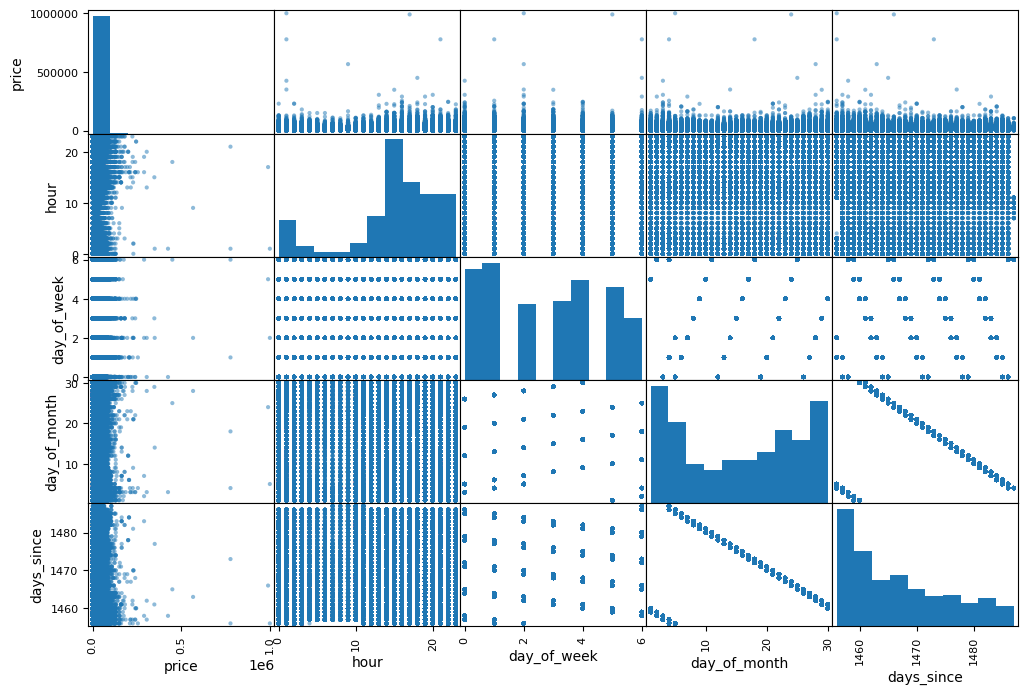

In [105]:
pd.plotting.scatter_matrix(date_df[['price','hour','day_of_week','day_of_month','days_since']], figsize=(12, 8))

**Question:** Do you think `posting_time` is a good attribute for predicting the price? Why/why not?

**Answer:** `No, the price seems to be very similar no matter when the listing was posted.`

Now lets look at the data in the latitude and longitude columns.

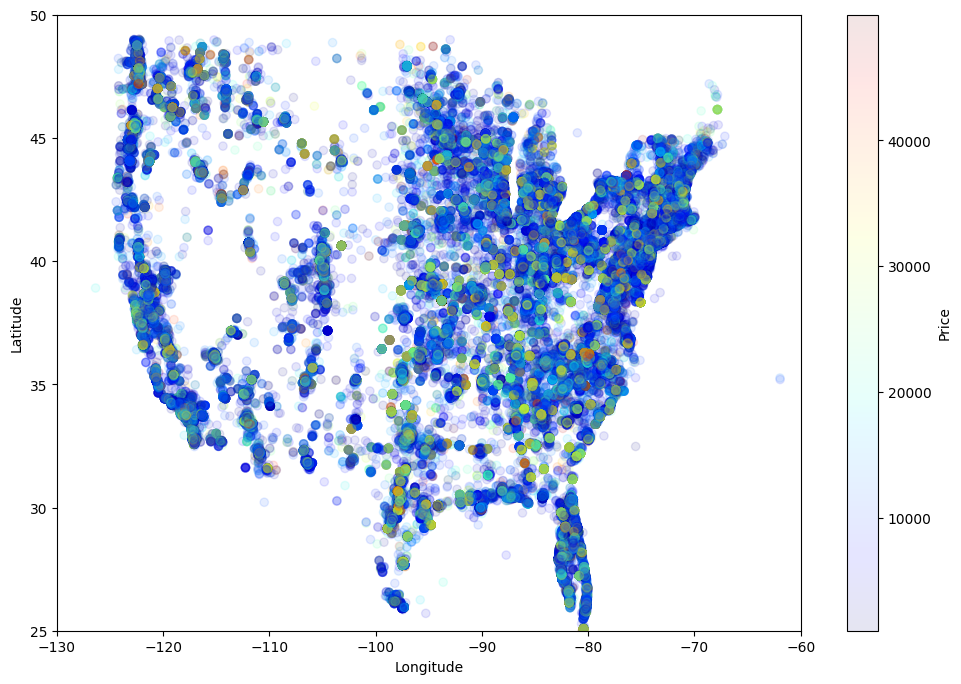

In [126]:
# Plot the listed cars on geographical scatterplot with the color of the dots
# representing the car price. Use the alpha parameter to improve the visualization.
# Only plot cars with prices ranging from $1000 to $50000
# Only plot the continental United States (approximately 25<lat<50, -130<long<-60)

price_filter = (date_df['price'] > 1000) & (date_df['price'] < 50000)
data_filtered = date_df[price_filter]

plt.figure(figsize=(12, 8))
plt.scatter(
    data_filtered.long,
    data_filtered.lat,
    c=data_filtered['price'],
    cmap=plt.get_cmap('jet'),
    alpha=0.1
)
plt.colorbar(label='Price')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.ylim(25, 50)
plt.xlim(-130, -60)
plt.show()

**Question:** Can you spot any obvious geographical pattern in the price distribution? You can try zooming into a particular region.

**Answer:** `What can be seen is that cars are more sold where more people live, unsurprisingly. Along the coastlines are more cars sold, less in the middle of the country.`

**Question:** Do you think `lat` and/or `long` are good attributes for predicting the price?

**Answer:** `Not really, it seems to be pretty similarly distributed over the whole country.`

In [110]:
# Another attribute we can assume affects the price of the car is the condition it is in.
# Print a list of all the values the 'condition' column takes.

print(date_df['condition'].unique())

[nan 'excellent' 'new' 'good' 'like new' 'fair' 'salvage']


In [111]:
# How many rows are there of each condition?

print(date_df['condition'].value_counts())

condition
good         97491
excellent    78151
like new     16443
fair          5225
new            848
salvage        485
Name: count, dtype: int64


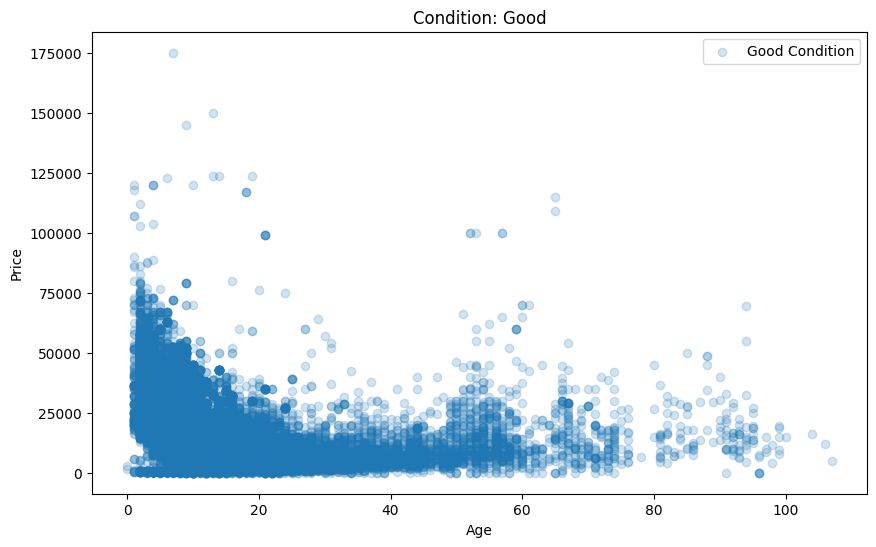

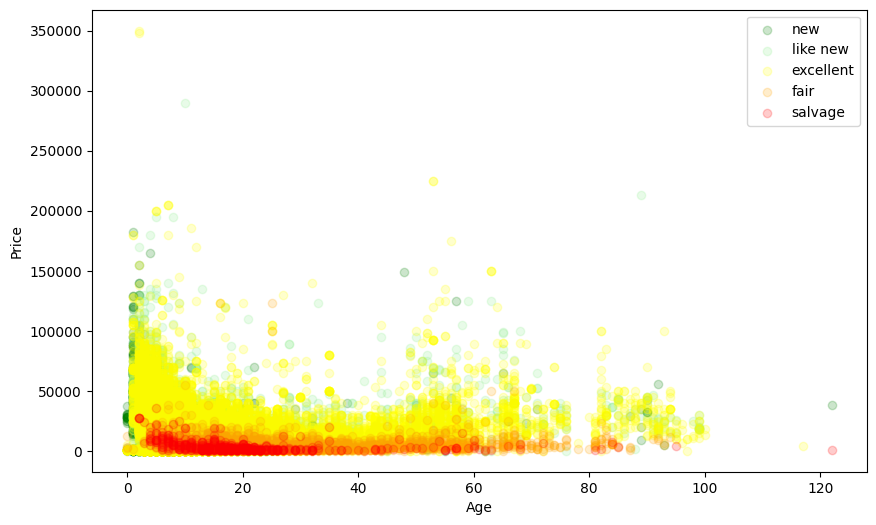

In [120]:
# Create a scatter plot of the data where 'condition' is 'good' with 'age' on the 
# horizontal axis and 'price' on the vertical axis.

condition_filter = date_df['condition'] == 'good'
plt.figure(figsize=(10, 6))
plt.scatter(
    date_df[condition_filter]['age'],
    date_df[condition_filter]['price'],
    alpha=0.2,
    label='Good Condition'
)
plt.xlabel('Age')
plt.ylabel('Price')
plt.title('Condition: Good')
plt.legend()
plt.show()

# Create another figure for the other values of 'condition'. 
# Make the points which correspond to cars in different conditions a different color.
# Plot these all in one figure and use transparancy (alpha) to improve visibility.

condition_colors = {
    'new': 'green',
    'like new': 'lightgreen',
    'excellent': 'yellow',
    'fair': 'orange',
    'salvage': 'red'
}

plt.figure(figsize=(10, 6))
for condition, color in condition_colors.items():
    condition_filter = date_df['condition'] == condition
    plt.scatter(
        date_df[condition_filter]['age'],
        date_df[condition_filter]['price'],
        c=color,
        alpha=0.2,
        label=condition
    )
plt.xlabel('Age')
plt.ylabel('Price')
plt.legend()
plt.show()

**Question:** Do you think `condition` is a good attribute for predicting the price?

**Answer:** `Age seems to be a better predictor, although when the condition is 'salvage', the price is obviously lower. The other conditions seem to have very similar distribution of price.`

In [121]:
# How many rows are there of each manufacturer?

date_df['manufacturer'].value_counts()

manufacturer
ford               55430
chevrolet          43375
toyota             27038
honda              17001
jeep               14941
nissan             14874
ram                14037
gmc                13178
bmw                11748
dodge              10571
mercedes-benz       8924
hyundai             8031
subaru              7749
volkswagen          7586
lexus               6605
kia                 6457
audi                6129
cadillac            5610
chrysler            4832
acura               4831
buick               4435
mazda               4332
infiniti            3809
lincoln             3451
volvo               2800
mitsubishi          2664
mini                1932
pontiac             1909
rover               1713
jaguar              1619
porsche             1125
mercury              963
saturn               902
tesla                749
alfa-romeo           748
fiat                 638
harley-davidson      125
ferrari               67
datsun                55
aston-martin

In [127]:
# How many rows are there of each fuel type?

print(date_df['fuel'].value_counts())

fuel
gas         273119
other        23041
diesel       19560
hybrid        4091
electric      1309
Name: count, dtype: int64


<Axes: >

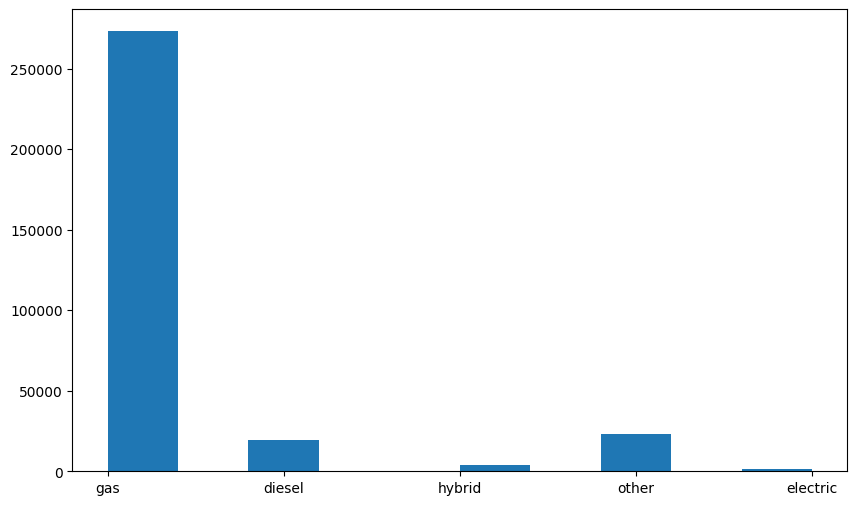

In [130]:
# Plot a histogram of the 'fuel' values.

date_df.fuel.hist(grid=False, figsize=(10, 6))

In [131]:
# How many rows are there of each size?

print(date_df['size'].value_counts())

size
full-size      47694
mid-size       26298
compact        14390
sub-compact     2284
Name: count, dtype: int64


In [132]:
# How many rows are there of each value of the 'cylinders' column?

print(date_df['cylinders'].value_counts())

cylinders
6 cylinders     73213
4 cylinders     60106
8 cylinders     54818
5 cylinders      1315
10 cylinders     1142
other             734
3 cylinders       440
12 cylinders       96
Name: count, dtype: int64


In [133]:
# Print the number of unique 'model' values present in the data

print(date_df['model'].nunique())

20965


In [135]:
# Wow, that is a lot of unique model names!

# How many rows are there of each 'model' value where the 'manufacturer' is 'toyota'?
# Print the number of rows for the top 50 toyota 'model' names.

toyota_models = date_df[date_df['manufacturer'] == 'toyota']
print(toyota_models['model'].value_counts().head(50))

model
camry                        2448
tacoma                       2021
corolla                      1694
rav4                         1304
prius                        1155
tundra                       1109
sienna                        892
highlander                    833
4runner                       824
camry le                      461
tacoma access cab pickup      400
4runner sr5 sport utility     342
avalon                        335
corolla le                    325
tundra double cab sr          266
tundra crewmax sr5 pickup     253
sienna le                     239
tacoma double cab pickup      219
fj cruiser                    217
tacoma access cab sr5         213
camry se                      207
sequoia                       197
tacoma double cab             185
yaris                         185
4runner sr5                   179
land cruiser                  160
venza                         148
sienna xle                    147
camry le sedan 4d             144
camry xl

## Do your own exploring

Can you think of other aspects of the dataset you would like to explore? Are there distributions or relationships in the data which could be used when modeling?

<Axes: xlabel='manufacturer'>

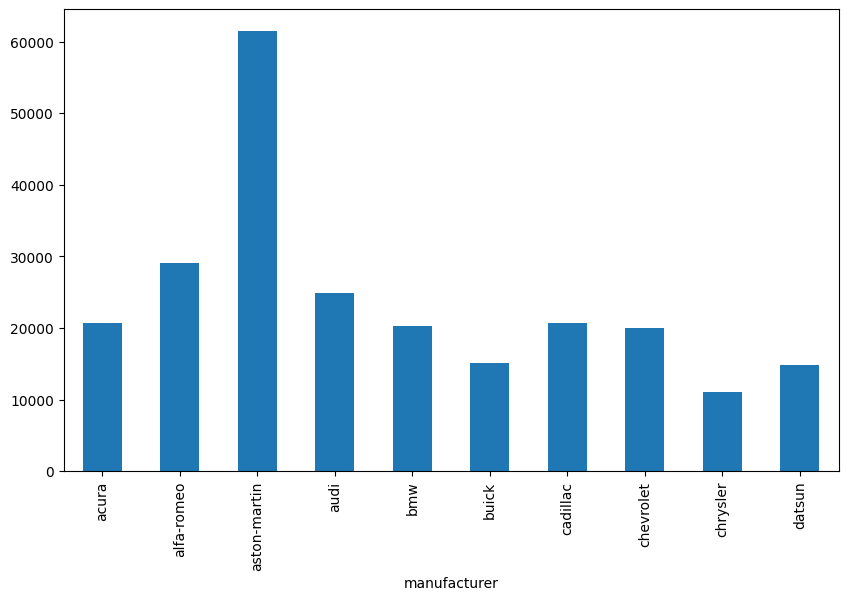

In [ ]:
# Plot mean prices for each of the top 10 highest priced manufacturers.
mean_prices = date_df.groupby('manufacturer')['price'].mean().head(10)
mean_prices.plot(kind='bar', figsize=(10, 6))